In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical


In [2]:

(train_mnist_img, train_mnist_label), (test_mnist_img, test_mnist_label) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
modeld = models.Sequential()
modeld.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
modeld.add(layers.Dense(10, activation='softmax'))
modeld.compile(optimizer='rmsprop',
loss='mean_squared_error',
metrics=['accuracy'])

In [5]:
train_mnist_img_norm = train_mnist_img.reshape((60000, 28 * 28))
train_mnist_img_flat = train_mnist_img_norm.astype('float32') / 255

test_mnist_img_norm = test_mnist_img.reshape((10000, 28 * 28))
test_mnist_img_flat = test_mnist_img_norm.astype('float32') / 255

In [6]:
modeld.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [7]:
train_mnist_label = to_categorical(train_mnist_label)
test_mnist_label = to_categorical(test_mnist_label)

In [8]:
modeld.fit(train_mnist_img_flat, train_mnist_label, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 10ms/step - loss: 0.7595 - accuracy: 0.7404
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3980 - accuracy: 0.8556
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3463 - accuracy: 0.8728
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.3116 - accuracy: 0.8851
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.2918 - accuracy: 0.8937


In [9]:
train_loss, train_acc = modeld.evaluate(train_mnist_img_flat, train_mnist_label)
test_loss, test_acc = modeld.evaluate(test_mnist_img_flat, test_mnist_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3845 - accuracy: 0.8666


In [10]:
print('test_acc:', test_acc)
print('train_acc:', test_acc)

test_acc: 0.866599977016449
train_acc: 0.866599977016449


[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


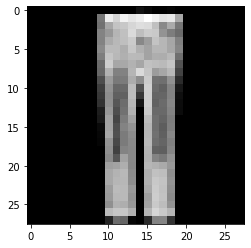

In [18]:
pred = modeld.predict(test_mnist_img_flat[:12])
img_num =15
print(test_mnist_label[img_num])
plt.imshow(test_mnist_img[img_num], cmap=plt.get_cmap('gray'))
plt.show()

In [20]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))

In [21]:
train2_mnist_img_norm = train_mnist_img.reshape((60000, 28 , 28, 1))
train2_mnist_img_flat = train2_mnist_img_norm.astype('float32') / 255

test2_mnist_img_norm = test_mnist_img.reshape((10000, 28 , 28, 1))
test2_mnist_img_flat = test2_mnist_img_norm.astype('float32') / 255

In [22]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model2.fit(train2_mnist_img_flat, train_mnist_label, epochs=10, batch_size=64)

Epoch 1/10
938/938 [==============================] - 52s 55ms/step - loss: 0.7413 - accuracy: 0.7248
Epoch 2/10
938/938 [==============================] - 52s 55ms/step - loss: 0.3457 - accuracy: 0.8729
Epoch 3/10
938/938 [==============================] - 52s 56ms/step - loss: 0.2811 - accuracy: 0.8961
Epoch 4/10
938/938 [==============================] - 52s 56ms/step - loss: 0.2473 - accuracy: 0.9087
Epoch 5/10
938/938 [==============================] - 53s 56ms/step - loss: 0.2289 - accuracy: 0.9155
Epoch 6/10
938/938 [==============================] - 52s 56ms/step - loss: 0.2025 - accuracy: 0.9241
Epoch 7/10
938/938 [==============================] - 52s 55ms/step - loss: 0.1854 - accuracy: 0.9316
Epoch 8/10
938/938 [==============================] - 52s 55ms/step - loss: 0.1728 - accuracy: 0.9354
Epoch 9/10
938/938 [==============================] - 52s 55ms/step - loss: 0.1599 - accuracy: 0.9403
Epoch 10/10
938/938 [==============================] - 52s 55ms/step - loss: 0.147

In [26]:
train2_loss, train2_acc = model2.evaluate(train2_mnist_img_flat, train_mnist_label)
test2_loss, test2_acc = model2.evaluate(test2_mnist_img_flat, test_mnist_label)

313/313 [==============================] - 3s 10ms/step - loss: 0.2968 - accuracy: 0.9095


In [28]:
print('Train2_accuracy:', train2_acc)
print('Test2_accuracy:', test2_acc)
print('Train_accuracy:', train_acc)
print('Test_accuracy:',test_acc)

Train2_accuracy: 0.9507666826248169
Test2_accuracy: 0.909500002861023
Train_accuracy: 0.890666663646698
Test_accuracy: 0.866599977016449


In [32]:
from tensorflow.keras.callbacks import EarlyStopping
modelb = models.Sequential()
modelb.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
modelb.add(layers.MaxPooling2D((2, 2)))
modelb.add(layers.Conv2D(64, (3, 3), activation='relu'))
modelb.add(layers.Flatten())
modelb.add(layers.Dense(64, activation='relu'))
modelb.add(layers.Dense(10, activation='softmax'))

modelb.summary(line_length=None, positions=None, print_fn=None)


modelb.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#deleting 3 layers and applying early stopping 
trained_models = modelb.fit(train2_mnist_img_flat, train_mnist_label, epochs=30, batch_size=128, validation_data=(test2_mnist_img_flat, test_mnist_label), 

callbacks = [EarlyStopping(monitor='val_accuracy', patience=3)])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
flatten_4 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                495680    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                650       
Total params: 515,146
Trainable params: 515,146
Non-trainable params: 0
________________________________________________

In [34]:
trainb_loss, trainb_acc = modelb.evaluate(train2_mnist_img_flat, train_mnist_label)
testb_loss, testb_acc = modelb.evaluate(test2_mnist_img_flat, test_mnist_label)

313/313 [==============================] - 3s 9ms/step - loss: 0.2462 - accuracy: 0.9232


In [38]:
print('Test_accuracy:', test_acc)
print('Train_accuracy:', test_acc)
print('')
print('Train2_accuracy:', train2_acc)
print('Test2_accuracy:', test2_acc)
print('')
print('Trainb_accuracy:', trainb_acc)
print('Testb_accuracy:', testb_acc)
print('')
print('Better:', trainb_acc - train2_acc)

Test_accuracy: 0.866599977016449
Train_accuracy: 0.866599977016449

Train2_accuracy: 0.9507666826248169
Test2_accuracy: 0.909500002861023

Trainb_accuracy: 0.9817500114440918
Testb_accuracy: 0.9232000112533569

Better: 0.030983328819274902
